***Stock  Market Prediction  using  Numerical and  Textual Analysis***



In [3]:
import pandas as pd
import numpy  as np
import seaborn as sns
import matplotlib.pyplot as plt

In [77]:
import warnings
warnings.filterwarnings('ignore')

In [78]:
from textblob import TextBlob
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem import PorterStemmer


In [79]:
from nltk.corpus import stopwords
import nltk

In [81]:
from nltk.corpus import stopwords
import nltk
nltk.download()
print('Imported')

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> d

Download which package (l=list; x=cancel)?
  Identifier> d
    Error loading d: Package 'd' not found in index

---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> d

Download which package (l=list; x=cancel)?
  Identifier> d
    Error loading d: Package 'd' not found in index

---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> q
Imported


In [82]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [83]:
df=pd.read_csv('/content/india-news-headlines.csv')
df.head()

,publish_date,headline_category,headline_text
0,20010101,sports.wwe,win over cena satisfying but defeating underta...
1,20010102,unknown,Status quo will not be disturbed at Ayodhya; s...
2,20010102,unknown,Fissures in Hurriyat over Pak visit
3,20010102,unknown,America's unwanted heading for India?
4,20010102,unknown,For bigwigs; it is destination Goa


In [84]:
df1=df[["headline_category","headline_text"]]
df1.to_csv('df1.csv',index=False)
df2=pd.read_csv('df1.csv')
df2.columns = ["headline_category","headline_text"]
df2=df2.head(5000)
df2.head()

,headline_category,headline_text
0,sports.wwe,win over cena satisfying but defeating underta...
1,unknown,Status quo will not be disturbed at Ayodhya; s...
2,unknown,Fissures in Hurriyat over Pak visit
3,unknown,America's unwanted heading for India?
4,unknown,For bigwigs; it is destination Goa


In [85]:
#Dropping duplicate rows
df2=df2.dropna()
df2.duplicated().sum()
df2=df2.drop_duplicates()
df2

,headline_category,headline_text
0,sports.wwe,win over cena satisfying but defeating underta...
1,unknown,Status quo will not be disturbed at Ayodhya; s...
2,unknown,Fissures in Hurriyat over Pak visit
3,unknown,America's unwanted heading for India?
4,unknown,For bigwigs; it is destination Goa
...,...,...
4995,city.mumbai,Residents upbeat about Premier's second coming
4996,city.bengaluru,Flashback time: remembering Jim Corbett
4997,city.hyderabad,Oracle to invest $15m in development centre
4998,india,Foreigners' order to be reviewed


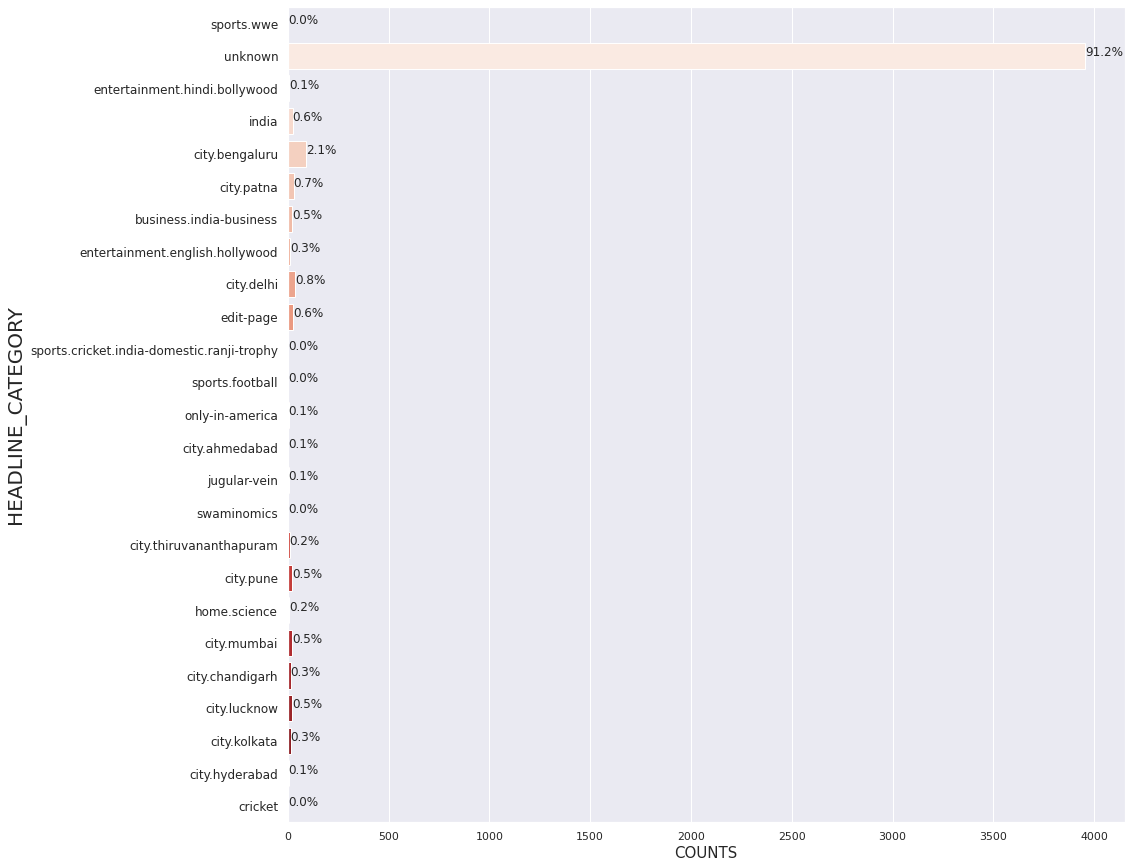

In [86]:
#NOW LET'S LOOK FOR A TREND IN THE COLUMN "HEADLINE CATEGORY" THROUGH VISUALIZATION
plt.figure(figsize=(15,15))
sns.set_theme()
ax=sns.countplot(y=df2['headline_category'],palette="Reds")
plt.yticks(fontsize=12);
plt.ylabel('HEADLINE_CATEGORY', fontsize=20)
plt.xlabel('COUNTS',fontsize=15)
total = len(df2['headline_category'])
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))
plt.show() 

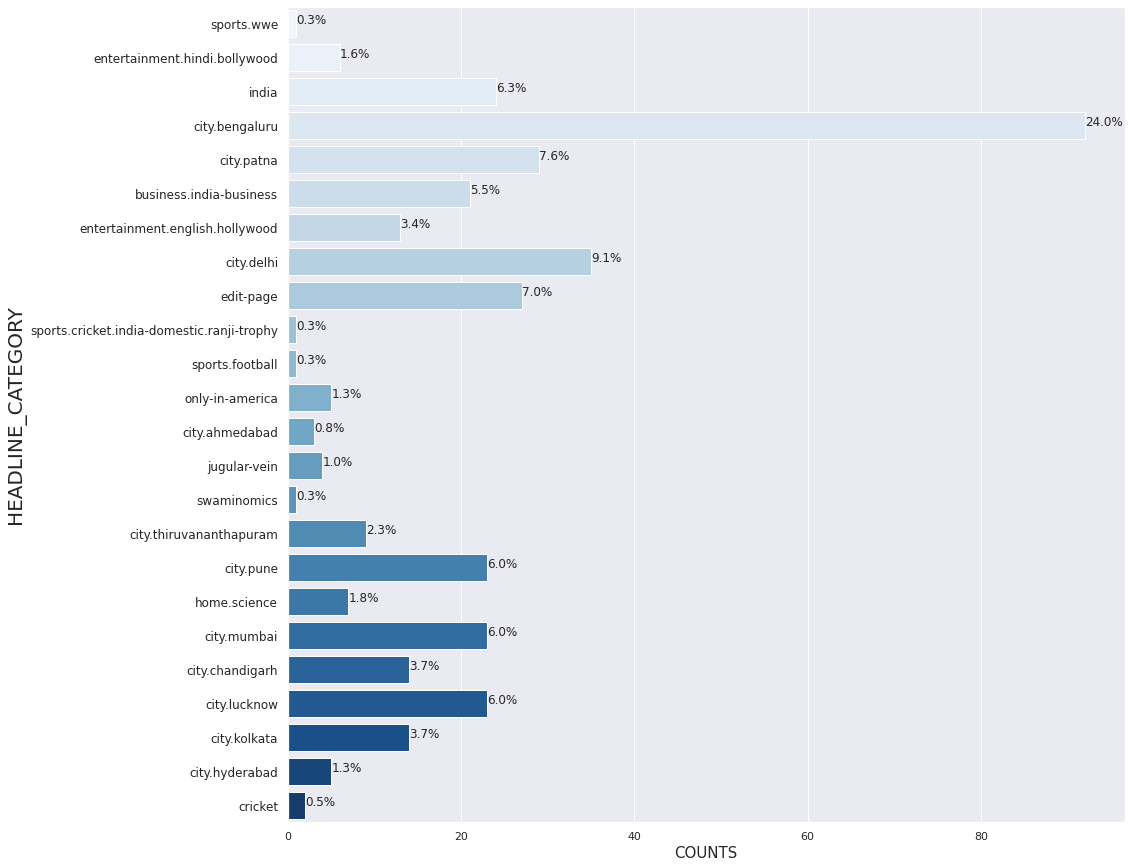

In [87]:
#LET'S REMOVE THE CATEGORY - "UNKNOWN" FOR THE FOLLOWING PLOT AND VISUALIZE THE TREND, AS IT HOLDS MORE THAN 90 PERCENTAGE OF THE SPACE
plt.figure(figsize=(15,15))
df211=df2[df2['headline_category']!='unknown']
ax=sns.countplot(y=df211['headline_category'],palette="Blues")
plt.yticks(fontsize=12);
plt.ylabel('HEADLINE_CATEGORY', fontsize=20)
plt.xlabel('COUNTS',fontsize=15)
total = len(df211['headline_category'])
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))
plt.show()

In [88]:
#NUMBER OF WORDS IN EACH ROW:
df2['word_count'] = df2['headline_text'].apply(lambda x: len(str(x).split(" ")))
df2[['headline_text','word_count']].head()

,headline_text,word_count
0,win over cena satisfying but defeating underta...,10
1,Status quo will not be disturbed at Ayodhya; s...,10
2,Fissures in Hurriyat over Pak visit,6
3,America's unwanted heading for India?,5
4,For bigwigs; it is destination Goa,6


In [89]:
#NUMBER OF CHARACTERS IN EACH STATEMENTS FROM EACH ROW
df2['char_count'] = df2['headline_text'].str.len()
df2[['headline_text','char_count']].head()

,headline_text,char_count
0,win over cena satisfying but defeating underta...,69
1,Status quo will not be disturbed at Ayodhya; s...,58
2,Fissures in Hurriyat over Pak visit,35
3,America's unwanted heading for India?,37
4,For bigwigs; it is destination Goa,34


In [90]:
#CALCULATING AVERAGE WORD LENGTH
def avg_word(sentence):
  words = sentence.split()
  return (sum(len(word) for word in words)/len(words))

df2['avg_word'] = df2['headline_text'].apply(lambda x: avg_word(x))
df2[['headline_text','avg_word']].head()

,headline_text,avg_word
0,win over cena satisfying but defeating underta...,6.000000
1,Status quo will not be disturbed at Ayodhya; s...,4.900000
2,Fissures in Hurriyat over Pak visit,5.000000
3,America's unwanted heading for India?,6.600000
4,For bigwigs; it is destination Goa,4.833333


In [92]:
#NUMBER OF SPECIAL CHARACTERS IN EACH STATEMENTS
df2['hastags'] = df2['headline_text'].apply(lambda x: len([x for x in x.split() if x.startswith('#')]))
df2[['headline_text','hastags']].head()

,headline_text,hastags
0,win over cena satisfying but defeating underta...,0
1,Status quo will not be disturbed at Ayodhya; s...,0
2,Fissures in Hurriyat over Pak visit,0
3,America's unwanted heading for India?,0
4,For bigwigs; it is destination Goa,0


In [93]:
### **NUMBER OF NUMERICS IN EACH STATEMENTS**
df2['numerics'] = df2['headline_text'].apply(lambda x: len([x for x in x.split() if x.isdigit()]))
df2[['headline_text','numerics']].head()

,headline_text,numerics
0,win over cena satisfying but defeating underta...,0
1,Status quo will not be disturbed at Ayodhya; s...,0
2,Fissures in Hurriyat over Pak visit,0
3,America's unwanted heading for India?,0
4,For bigwigs; it is destination Goa,0


In [94]:
#NUMBER OF UPPERCASE WORDS IN EACH HEADLINES FROM EACH ROW
df2['upper'] = df2['headline_text'].apply(lambda x: len([x for x in x.split() if x.isupper()]))
df2[['headline_text','upper']].head()

,headline_text,upper
0,win over cena satisfying but defeating underta...,0
1,Status quo will not be disturbed at Ayodhya; s...,0
2,Fissures in Hurriyat over Pak visit,0
3,America's unwanted heading for India?,0
4,For bigwigs; it is destination Goa,0


In [95]:
#NOW LET'S PREPROCESS THE DATA-CONVERTING EVERY WORDS IN THE COLUMN TO LOWER CASE
df2['headline_text'] = df2['headline_text'].apply(lambda x: " ".join(x.lower() for x in x.split()))
df2['headline_text'].head()

0    win over cena satisfying but defeating underta...
1    status quo will not be disturbed at ayodhya; s...
2                  fissures in hurriyat over pak visit
3                america's unwanted heading for india?
4                   for bigwigs; it is destination goa
Name: headline_text, dtype: object

In [96]:
#REMOVING PUNCTUATIONS
df2['headline_text'] = df2['headline_text'].str.replace('[^\w\s]','')
df2['headline_text'].head()

0    win over cena satisfying but defeating underta...
1    status quo will not be disturbed at ayodhya sa...
2                  fissures in hurriyat over pak visit
3                  americas unwanted heading for india
4                    for bigwigs it is destination goa
Name: headline_text, dtype: object

In [97]:
#CALCULATING THE NUMBER OF STOPWORDS
stop = stopwords.words('english')

df2['stopwords'] = df2['headline_text'].apply(lambda x: len([x for x in x.split() if x in stop]))
df2[['headline_text','stopwords']].head()

,headline_text,stopwords
0,win over cena satisfying but defeating underta...,2
1,status quo will not be disturbed at ayodhya sa...,4
2,fissures in hurriyat over pak visit,2
3,americas unwanted heading for india,1
4,for bigwigs it is destination goa,3


In [98]:
#REMOVING STOPWORDS
stop = stopwords.words('english')
df2['headline_text'] = df2['headline_text'].apply(
    lambda x: " ".join(x for x in x.split() if x not in stop))
df2['headline_text'].head()

0    win cena satisfying defeating undertaker bigge...
1           status quo disturbed ayodhya says vajpayee
2                          fissures hurriyat pak visit
3                      americas unwanted heading india
4                              bigwigs destination goa
Name: headline_text, dtype: object

In [99]:
#REMOVING COMMON WORDS
freq = pd.Series(' '.join(df2['headline_text']).split()).value_counts()[:10]
freq

govt     147
india    105
new       87
cong      63
cm        59
us        57
may       56
power     54
says      53
get       53
dtype: int64

In [100]:
freq = list(freq.index)
df2['headline_text'] = df2['headline_text'].apply(
    lambda x: " ".join(x for x in x.split() if x not in freq))
df2['headline_text'].head()

0    win cena satisfying defeating undertaker bigge...
1                status quo disturbed ayodhya vajpayee
2                          fissures hurriyat pak visit
3                            americas unwanted heading
4                              bigwigs destination goa
Name: headline_text, dtype: object

In [101]:
#REMOVING RARE WORDS TO GET RID OF NOISE
freq = pd.Series(' '.join(df2['headline_text']).split()).value_counts()[-10:]
freq

filing           1
ngef             1
breakthroughs    1
debris           1
drowns           1
clamped          1
jac              1
squillari        1
electronic       1
thank            1
dtype: int64

In [112]:
#STEMMING
st = PorterStemmer()
df2['headline_text'].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))

0       win cena satisfi defeat undertak bigger roman ...
1                       statu quo disturb ayodhya vajpaye
2                               fissur hurriyat pak visit
3                                     america unwant head
4                                       bigwig destin goa
                              ...                        
4995                     resid upbeat premier second come
4996                    flashback time rememb jim corbett
4997                       oracl invest 15m develop centr
4998                                 foreign order review
4999                           dismiss order pass hurryhc
Name: headline_text, Length: 4337, dtype: object

In [113]:
#TERM FREQUENCY
tf1 = (df2['headline_text'][1:]).apply(lambda x: pd.value_counts(x.split(" "))).sum(axis = 0).reset_index()
tf1.columns = ['words','tf']
tf1

,words,tf
0,ayodhya,8.0
1,vajpayee,14.0
2,disturbed,1.0
3,quo,1.0
4,status,7.0
...,...,...
7830,15m,1.0
7831,oracle,1.0
7832,reviewed,1.0
7833,dismissal,1.0


FINALLY! LETS PERFORM SENTIMENTAL ANALYSIS FOR EACH ROWS IN A HEADLINE_TEXT COLUMN
CHECKING SENTIMENT (-1:NEGATIVE, 0:NEUTRAL, 1:POSITIVE)¶

In [115]:
df2['headline_text'][1:].apply(lambda x: TextBlob(x).sentiment)

1                                       (0.0, 0.0)
2                                       (0.0, 0.0)
3                                       (0.0, 0.0)
4                                       (0.0, 0.0)
5       (0.05000000000000001, 0.24166666666666664)
                           ...                    
4995                                    (0.0, 0.0)
4996                                    (0.0, 0.0)
4997                                    (0.0, 0.0)
4998                                    (0.0, 0.0)
4999                                    (0.0, 0.0)
Name: headline_text, Length: 4336, dtype: object

In [116]:
#NOW ASSIGNING POLARITY TO EACH ROWS OF STATEMENT. POLARITY RANGE FROM -1 TO 1
df2['sentiment'] = df2['headline_text'].apply(lambda x: TextBlob(x).sentiment[0] )
df2[['headline_text','sentiment']].head()

,headline_text,sentiment
0,win cena satisfying defeating undertaker bigge...,0.433333
1,status quo disturbed ayodhya vajpayee,0.000000
2,fissures hurriyat pak visit,0.000000
3,americas unwanted heading,0.000000
4,bigwigs destination goa,0.000000


In [117]:
df2

,headline_category,headline_text,word_count,char_count,avg_word,hastags,numerics,upper,stopwords,sentiment
0,sports.wwe,win cena satisfying defeating undertaker bigge...,10,69,6.000000,0,0,0,2,0.433333
1,unknown,status quo disturbed ayodhya vajpayee,10,58,4.900000,0,0,0,4,0.000000
2,unknown,fissures hurriyat pak visit,6,35,5.000000,0,0,0,2,0.000000
3,unknown,americas unwanted heading,5,37,6.600000,0,0,0,1,0.000000
4,unknown,bigwigs destination goa,6,34,4.833333,0,0,0,3,0.000000
...,...,...,...,...,...,...,...,...,...,...
4995,city.mumbai,residents upbeat premiers second coming,6,46,6.833333,0,0,0,1,0.000000
4996,city.bengaluru,flashback time remembering jim corbett,5,39,7.000000,0,0,0,0,0.000000
4997,city.hyderabad,oracle invest 15m development centre,7,43,5.285714,0,0,0,2,0.000000
4998,india,foreigners order reviewed,5,32,5.600000,0,0,0,2,0.000000


ASSIGNING VALUE 1 TO ALL THOSE SENTIMENTS WHOSE POLARITY IS GREATER THAN 0 , AND VALUE -1 TO ALL THOSE SENTIMENTS WHOSE POLARITY IS SMALLER THAN 0 WHILE LEAVING SENTIMENTS WHOSE POLARITY IS EQUAL TO ZERO AS IT IS¶

In [118]:
x1=df2[df2['sentiment']>=0.5]
x2=df2[df2['sentiment']<0.5]

In [119]:
df2['sentiment']=df2['sentiment'].astype(float)
df2.sentiment[df2.sentiment>0]=1
df2.sentiment[df2.sentiment<0]=-1;

In [66]:
#FINAL DATASET TABLE
df2.head(20)

,headline_category,headline_text,word_count,char_count,avg_word,hastags,numerics,upper,stopwords,sentiment
0,sports.wwe,win cena satisfying defeating undertaker bigge...,10,69,6.000000,0,0,0,2,1.0
1,unknown,status quo disturbed ayodhya vajpayee,10,58,4.900000,0,0,0,4,0.0
2,unknown,fissures hurriyat pak visit,6,35,5.000000,0,0,0,2,0.0
3,unknown,americas unwanted heading,5,37,6.600000,0,0,0,1,0.0
4,unknown,bigwigs destination goa,6,34,4.833333,0,0,0,3,0.0
5,unknown,extra buses clear tourist traffic,6,36,5.166667,0,0,0,1,1.0
6,unknown,dilute transfers riberio,7,43,5.285714,0,0,0,2,0.0
7,unknown,focus shifts teaching hindi,6,33,4.666667,0,0,0,2,0.0
8,unknown,become compulsory schools,6,36,5.166667,0,0,1,3,0.0
9,unknown,move stop freedom fighters pension flayed,7,45,5.571429,0,0,0,1,0.0


THE LAST AND FINAL RESULT: VISUALIZING OUR RESULT BY DISTRIBUTING IT AS NEGATIVE, NEUTRAL AND POSITIVE SENTIMENTS BASED ON THEIR SENTIMENTAL POLARITY WE ACQUIRED FROM ALL OF THE ABOVE ANALYSING TECHNIQUES

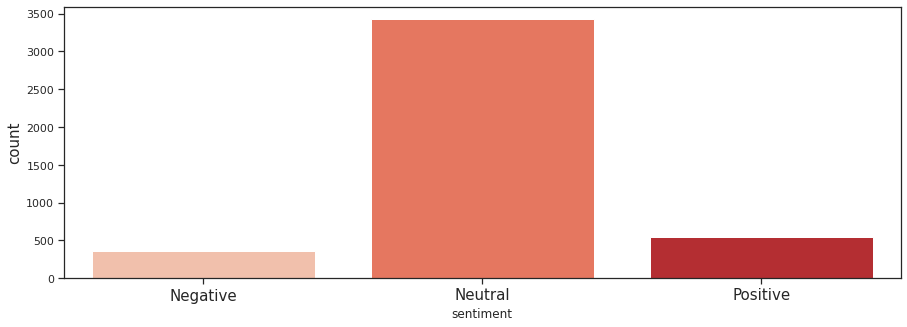

In [120]:
plt.figure(figsize=(15,5))
sns.set(style="ticks")
ax=sns.countplot(df2['sentiment'],palette='Reds' )
plt.ylabel('count',fontsize = 15)
ax.set_xticklabels(['Negative','Neutral','Positive'], fontsize = 15);

From the above visualization it is very much clear that most of the headline topics published by TOI has neutral sentiments, followed by positive and negative sentiments.¶

Note:
1. As the dataset was too big to handle with jupyter and collab, I analysed only a part of the dataset
2.Actual size of dataset: 32,97,172 rows
3.Size of the dataset I used for analyzing: 5000 rows